<a href="https://colab.research.google.com/github/ameympatil/MIT-ML/blob/main/Basic_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN

In [242]:
!pip install tensorflow 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [243]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [244]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [245]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Feature Engineering

In [246]:
# Divide dataset into independent and dependent features
X = df.iloc[:,3:-1]
y = df.iloc[:,-1]

In [247]:
# Handling Categorical features
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [248]:
# Concatenate variables
X.drop(columns=['Gender','Geography'],axis=1,inplace=True)

In [249]:
X = pd.concat([X,geography,gender],axis=1)

In [250]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [251]:
# Divide dataset into independent and dependent features
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [252]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0


In [253]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.values)
X_test = sc.transform(X_test.values)

In [254]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [255]:
X_train.shape

(8000, 11)

# ANN

In [256]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU,ELU,PReLU
from tensorflow.keras.layers import Dropout

In [257]:
# initialize ANN
model = Sequential()

# Adding Input Layer
model.add(Dense(units=X_train.shape[1],activation='relu'))

# Adding First Hidden Layer
model.add(Dense(units=7,activation='relu'))
model.add(Dropout(0.3))

# Adding Second Hidden Layer
model.add(Dense(units=6,activation='relu'))
model.add(Dropout(0.3))

# Adding Output Layer
model.add(Dense(units=1,activation='sigmoid'))

In [258]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [269]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [270]:
# Early Stoping
import tensorflow as tf
call = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [271]:
model_history = model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=[call])

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.3613 - accuracy: 0.8468 - val_loss: 0.3709 - val_accuracy: 0.8512
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3596 - accuracy: 0.8475 - val_loss: 0.3710 - val_accuracy: 0.8504
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3515 - accuracy: 0.8507 - val_loss: 0.3727 - val_accuracy: 0.8493
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3557 - accuracy: 0.8453 - val_loss: 0.3707 - val_accuracy: 0.8538
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3560 - accuracy: 0.8496 - val_loss: 0.3728 - val_accuracy: 0.8527
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3562 - accuracy: 0.8503 - val_loss: 0.3743 - val_accuracy: 0.8546
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3502 - accuracy: 0.8513 - val_loss: 0.3761 - val_accuracy:

In [280]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

200/200 [==============================] - 1s 2ms/step - loss: 0.3698 - accuracy: 0.8610
Test score: 0.3697766661643982
Test accuracy: 0.8610000014305115


In [272]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

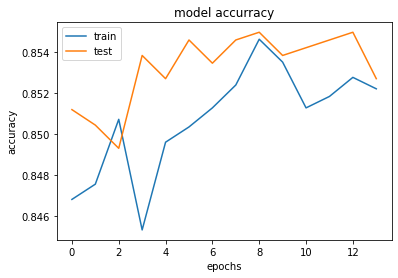

In [273]:
# Summarize for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accurracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

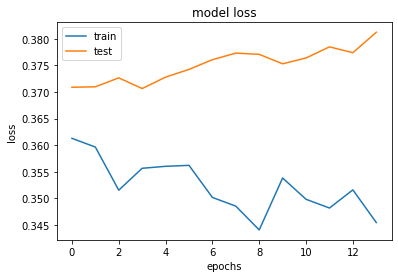

In [274]:
# Summarize for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [275]:
# Predictions
y_pred = model.predict(X_test)
y_pred = (y_pred>=0.5)

In [276]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1540,   55],
       [ 223,  182]])

In [277]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.861

In [278]:
# Weights
model.get_weights()

[array([[-0.398868  , -0.05621591, -0.19888121, -0.29193383,  0.57007504,
          1.685624  ,  0.18037729,  0.83835053, -0.26817346,  0.2121187 ,
          1.0273452 ],
        [ 0.70798147, -2.2100139 ,  1.2116053 ,  2.009424  , -0.2367483 ,
         -0.79599196, -0.68697864,  0.5270189 ,  0.28076187,  0.5061141 ,
         -1.6639099 ],
        [-0.31566885,  0.3096123 ,  0.06718142,  0.0229204 ,  0.66992414,
         -0.17899929,  0.46831432,  1.0835258 , -0.05719133,  0.27640784,
         -0.11864522],
        [ 1.3485332 ,  0.13315088, -1.0266963 ,  0.24802572,  1.3107527 ,
          0.34862185, -1.0124689 , -0.4768267 , -1.8821324 ,  0.36440185,
         -0.6722454 ],
        [ 2.7473104 , -0.03534112, -3.5268362 ,  0.5561639 , -0.97976065,
         -0.10831387,  0.4776341 , -0.02603544,  0.6982157 ,  2.4463763 ,
         -0.01668009],
        [-0.16901156,  0.1046817 , -0.30442855, -0.17279914,  0.3125969 ,
          0.6061375 , -0.6339117 ,  0.02358464,  0.02094849,  0.1007473